## 1) Simple regression with Pytorch

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable


# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy Dataset 
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out


Epoch [5/60], Loss: 0.2486
Epoch [10/60], Loss: 0.2468
Epoch [15/60], Loss: 0.2460
Epoch [20/60], Loss: 0.2455
Epoch [25/60], Loss: 0.2452
Epoch [30/60], Loss: 0.2450
Epoch [35/60], Loss: 0.2448
Epoch [40/60], Loss: 0.2446
Epoch [45/60], Loss: 0.2444
Epoch [50/60], Loss: 0.2442
Epoch [55/60], Loss: 0.2440
Epoch [60/60], Loss: 0.2438


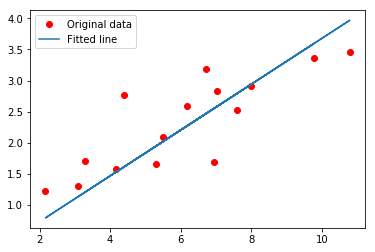

In [4]:
model = LinearRegression(input_size, output_size)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        #print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, loss.data[0]))
        print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, loss.data))
        
# Plot the graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the Model
torch.save(model.state_dict(), 'model.pkl')

## 1.5) Sample: CNN with Pytorch

In [29]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# Hyper Parameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Dataset
train_dataset = dsets.MNIST(root='../data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='../data/',
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# CNN Model (2 conv layer)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
        
cnn = CNN()


# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data))

# Test the Model
cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Trained Model
torch.save(cnn.state_dict(), 'cnn.pkl')

Epoch [1/5], Iter [100/600] Loss: 0.2189
Epoch [1/5], Iter [200/600] Loss: 0.0508
Epoch [1/5], Iter [300/600] Loss: 0.0961
Epoch [1/5], Iter [400/600] Loss: 0.1088
Epoch [1/5], Iter [500/600] Loss: 0.0113
Epoch [1/5], Iter [600/600] Loss: 0.1065
Epoch [2/5], Iter [100/600] Loss: 0.0576
Epoch [2/5], Iter [200/600] Loss: 0.0303
Epoch [2/5], Iter [300/600] Loss: 0.0658
Epoch [2/5], Iter [400/600] Loss: 0.0209
Epoch [2/5], Iter [500/600] Loss: 0.0291
Epoch [2/5], Iter [600/600] Loss: 0.0325
Epoch [3/5], Iter [100/600] Loss: 0.0248
Epoch [3/5], Iter [200/600] Loss: 0.0805
Epoch [3/5], Iter [300/600] Loss: 0.0080
Epoch [3/5], Iter [400/600] Loss: 0.0215
Epoch [3/5], Iter [500/600] Loss: 0.0560
Epoch [3/5], Iter [600/600] Loss: 0.0128
Epoch [4/5], Iter [100/600] Loss: 0.0149
Epoch [4/5], Iter [200/600] Loss: 0.0154
Epoch [4/5], Iter [300/600] Loss: 0.0162
Epoch [4/5], Iter [400/600] Loss: 0.0028
Epoch [4/5], Iter [500/600] Loss: 0.0098
Epoch [4/5], Iter [600/600] Loss: 0.0577
Epoch [5/5], Ite

## 2) Sample regression with Sklearn

Automatically created module for IPython interactive environment
Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


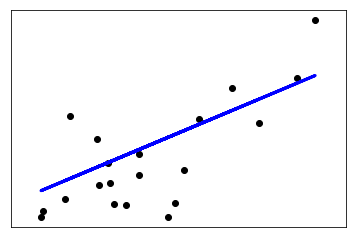

In [16]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# All feats
#diabetes_X = diabetes.data

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [14]:
diabetes_X.shape

(442, 1)

In [10]:
diabetes_X_train.shape

(422, 1)

In [11]:
diabetes_X_test.shape

(20, 1)

In [13]:
diabetes.data.shape

(442, 10)

## 3) Using torchsample: test with diabetes dataset

In [24]:
## float
diabetes_X_train = np.array(diabetes_X_train, dtype=np.float32)
diabetes_y_train = np.array(diabetes_y_train, dtype=np.float32)
diabetes_X_test = np.array(diabetes_X_test, dtype=np.float32)
diabetes_y_test = np.array(diabetes_y_test, dtype=np.float32)

In [25]:
x_train = Variable(torch.from_numpy(diabetes_X_train))
y_train = Variable(torch.from_numpy(diabetes_y_train))

x_test = Variable(torch.from_numpy(diabetes_X_test))
y_test = Variable(torch.from_numpy(diabetes_y_test))


In [26]:
from torchsample.modules import ModuleTrainer

model = LinearRegression(input_size, output_size)

# Loss and Optimizer: regression
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

#model = Network()
trainer = ModuleTrainer(model)

#trainer.compile(loss='nll_loss', optimizer='adadelta')
trainer.compile(loss=criterion, optimizer=optimizer)

trainer.fit(x_train, y_train, 
            val_data=(x_test, y_test),
            num_epoch=20, 
            batch_size=128,
            verbose=1)

Epoch 1/20:  25%|██▌       | 1/4 [00:00<00:00, 177.15 batches/s]


IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number

## 4) Example with CNN

In [ ]:
from torchsample.modules import ModuleTrainer

# Define your model EXACTLY as normal
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(1600, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 1600)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model = Network()
trainer = ModuleTrainer(model)

trainer.compile(loss='nll_loss',
                optimizer='adadelta')

trainer.fit(x_train, y_train, 
            val_data=(x_test, y_test),
            num_epoch=20, 
            batch_size=128,
            verbose=1)